<a href="https://colab.research.google.com/github/sanjoy-kumar/Machine-Learning/blob/main/linearRegession.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[1503.1975994643262, 462.8405221273348, 201.0819337828633, 135.22225545088534, 118.65163108818867, 114.48235618220761, 113.43331702797202, 113.1693433365517, 113.10289567554182, 113.08614645983346, 113.08190159875986, 113.08080289047055, 113.08049576894966, 113.08038781471183, 113.08032997232871, 113.08028473877856, 113.08024267813109, 113.08020141626339, 113.08016035583535, 113.08011934655369, 113.08007835060371, 113.08003735847113, 113.07999636776223, 113.07995537787443, 113.07991438865645, 113.07987340006999, 113.07983241210553, 113.07979142476051, 113.07975043803452, 113.07970945192724, 113.07966846643865, 113.07962748156883, 113.07958649731766, 113.07954551368515, 113.07950453067126, 113.07946354827614, 113.07942256649962, 113.07938158534172, 113.07934060480243, 113.07929962488173, 113.07925864557973, 113.07921766689627, 113.07917668883142, 113.07913571138508, 113.07909473455734, 113.07905375834827, 113.07901278275766, 113.0789718077856, 113.07893083343208, 113.07888985969711, 113

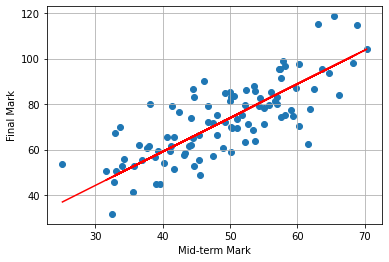

Last Error Value:  113.00015617555941


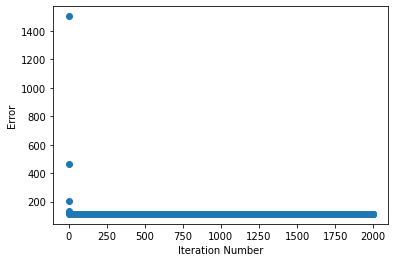

In [10]:
from numpy import *
import matplotlib.pyplot as plt


def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))



def step_gradiant(b_current, m_current, points, learning_rate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learning_rate * b_gradient)
    new_m = m_current - (learning_rate * m_gradient)
    return [new_b, new_m]



def run():
    data = genfromtxt("https://raw.githubusercontent.com/tofighi/MachineLearning/master/datasets/student_marks.csv",delimiter=",", skip_header=1)
    X_input= data[:,0]
    target = data[:,1]
    learning_rate = 0.0001  
    initial_b = -0.5
    initial_m = 0
    number_iterations = 2000


    ye =[]
    xe = []
    update_m = initial_m
    update_b = initial_b


    for i in range(number_iterations):
      xe.append(i)
      [b, m] = step_gradiant(update_b, update_m, data, learning_rate)
      update_b = b
      update_m = m
      errorOut = compute_error_for_line_given_points(b, m, data)
      ye.append(errorOut)

    print(ye)
    print("After {0} iterations: b = {1}".format(number_iterations,b))
    print("After {0} iterations: m = {1}".format(number_iterations,m))
    plt.scatter(X_input,target)
    plt.xlabel('Mid-term Mark')
    plt.ylabel('Final Mark')
    Y = m * X_input + b
    plt.plot(X_input, Y, '-r')
    plt.grid()
    plt.show()

# ---------------Create a new graph showing Error at each iteration ---------------------------
    print("Last Error Value: ",errorOut)
    plt.scatter(xe,ye)
    plt.xlabel('Iteration Number')
    plt.ylabel('Error')
    plt.show()
    
if __name__ == '__main__':
    run()    